In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from package_global_functions import *

In [2]:
def ode_rho_m(t,rhom,pi,l1,l2,gamma):
    '''
    ODEs with the full set of parameters: pi, l1,l2 for linear and quadratic recruitment, gamma for cross-inhibition
    mind that these parameters are actually rescaled by r, and we integrate in the rescaled time tau = t*r
    '''
    rho, m = rhom
    drho_dtau = (1-rho)*(2*pi + l1*rho + l2/2 * (rho**2 + m**2)) - rho - gamma/2*(rho**2 - m**2)
    dm_dtau = m * ((1-rho)*(l1+l2*rho) - 1)
    return [drho_dtau,dm_dtau]

def rho_m_teo(pi,l1,l2,gamma):
    if l2 < 1e-8 and l1 > 0.0 and gamma > 0.0: # CI model; no l2
        rho = 1 - 1/l1
    else: # gamma = 0 or l1 = 0 will work fine with the general formula
        rho = 0.5 * (1-l1/l2 + 1/l2 * np.sqrt((l1+l2)**2 - 4*l2))
    m = np.sqrt(rho**2 - 4*pi/(l2 + gamma/(1-rho)))
    return (rho, m)

In [3]:
rhom0 = (1.0, 0.01)

# combinations of parameters that yield very similar m* in both models
pi = 0.01
l1 = 1.5
other_interaction = 0.35
# another one:
pi = 0.2
l1 = 2.0
other_interaction = 1.78

# HOI
l2, gamma = other_interaction, 0.0
sol_hoi = solve_ivp(ode_rho_m, [0, 2000], rhom0, args=(pi, l1, l2, gamma))
rhom_teo_hoi = rho_m_teo(pi, l1, l2, gamma)
tss_hoi = evoTimeDeriv(sol_hoi, discard_initial=50.0)

# CI
l2, gamma = 0.0, other_interaction
sol_ci = solve_ivp(ode_rho_m, [0, 2000], rhom0, args=(pi, l1, l2, gamma))
rhom_teo_ci = rho_m_teo(pi, l1, l2, gamma)
tss_ci = evoTimeDeriv(sol_ci, discard_initial=50.0)
print('ms ', rhom_teo_hoi[1], rhom_teo_ci[1])
print('tss ', tss_hoi, tss_ci)

ms  0.164451794214093 0.15899968200095393
tss  491.28720448404636 243.5835335115328


In [59]:
sol_hoi_v2 = {'t':np.array([1,2,3]), 'y':[np.array([0.6,0.7,0.8]), np.array([0.1, 0.2, 0.3])]}

In [63]:
sol_hoi.y[1][sol_hoi.t > 1000]

array([0.16457432, 0.16457739, 0.16457921, 0.16457762, 0.16457459,
       0.16457363, 0.16457581, 0.16457868, 0.16457886, 0.16457618,
       0.16457384, 0.16457449, 0.1645774 , 0.16457922, 0.1645778 ,
       0.16457487, 0.16457385, 0.16457587, 0.16457865, 0.16457892,
       0.1645764 , 0.1645741 , 0.16457462, 0.16457738, 0.1645792 ,
       0.16457792, 0.16457512, 0.16457405, 0.1645759 , 0.16457859,
       0.16457895, 0.16457658, 0.16457432, 0.16457472, 0.16457734,
       0.16457915, 0.16457802, 0.16457533, 0.16457421, 0.16457592,
       0.16457851, 0.16457895, 0.16457674, 0.16457452, 0.16457481,
       0.16457729, 0.16457909, 0.16457809, 0.16457551, 0.16457436,
       0.16457592, 0.16457842, 0.16457893, 0.16457686, 0.16457469,
       0.16457489, 0.16457722, 0.16457901, 0.16457813, 0.16457567,
       0.16457449, 0.16457592, 0.16457833, 0.1645789 , 0.16457697,
       0.16457485, 0.16457495, 0.16457716, 0.16457893, 0.16457817,
       0.16457581, 0.16457462, 0.16457591, 0.16457823, 0.16457

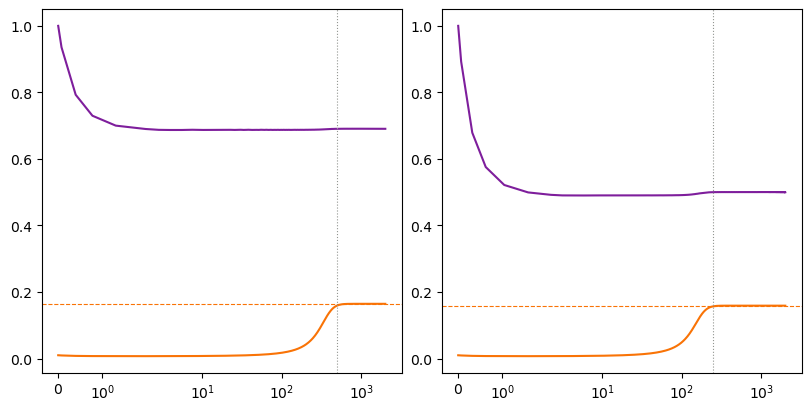

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), constrained_layout=True)
ax[0].set(xscale='symlog')
ax[1].set(xscale='symlog')

ax[0].plot(sol_hoi.t, sol_hoi.y[0], color='xkcd:purple')
ax[0].plot(sol_hoi.t, sol_hoi.y[1], color='xkcd:orange')
ax[0].axhline(rhom_teo_hoi[1], color='xkcd:orange', ls='--', lw=0.8)
ax[0].axvline(tss_hoi, color='xkcd:gray', ls=':', lw=0.8)

ax[1].plot(sol_ci.t, sol_ci.y[0], color='xkcd:purple')
ax[1].plot(sol_ci.t, sol_ci.y[1], color='xkcd:orange')
ax[1].axhline(rhom_teo_ci[1], color='xkcd:orange', ls='--', lw=0.8)
ax[1].axvline(tss_ci, color='xkcd:gray', ls=':', lw=0.8)